# Module 10: Logscale

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

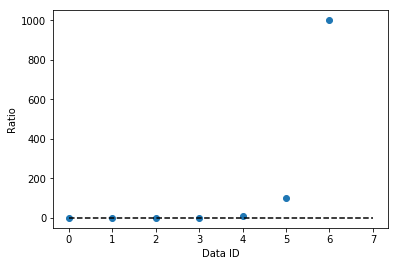

In [86]:
x1 = [0,len(ratio)] # create an array of integers 0 to 7
y1 = [1,1] # create an array of 1s
plt.scatter(np.arange(len(ratio)), ratio)
plt.ylabel("Ratio")
plt.xlabel("Data ID")
plt.plot(x1, y1, 'k--') 
plt.show()

**Q: Explain what's bad about this plot.**

In [ ]:
The Y axis is hiding the ratio points for the first 5 points since the distance between 0 and 200 is too short. 
It is impossible to distinguish the ratio points on this scale

**Q: Can you fix it? **

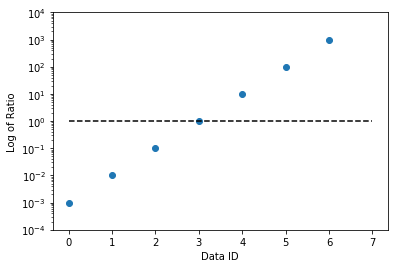

In [89]:
# Implement
plt.scatter(np.arange(len(ratio)), ratio)
plt.yscale('log')
plt.ylim((0.0001,10000))
plt.ylabel("Log of Ratio")
plt.xlabel("Data ID")
plt.plot(x1, y1, 'k--') 
plt.show()

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [30]:
# Implement
import vega_datasets

movies = vega_datasets.data.movies()
movies=movies.dropna(subset=['IMDB_Rating', 'IMDB_Votes', 'Rotten_Tomatoes_Rating'])


If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C2FF9F518>,
      dtype=object)

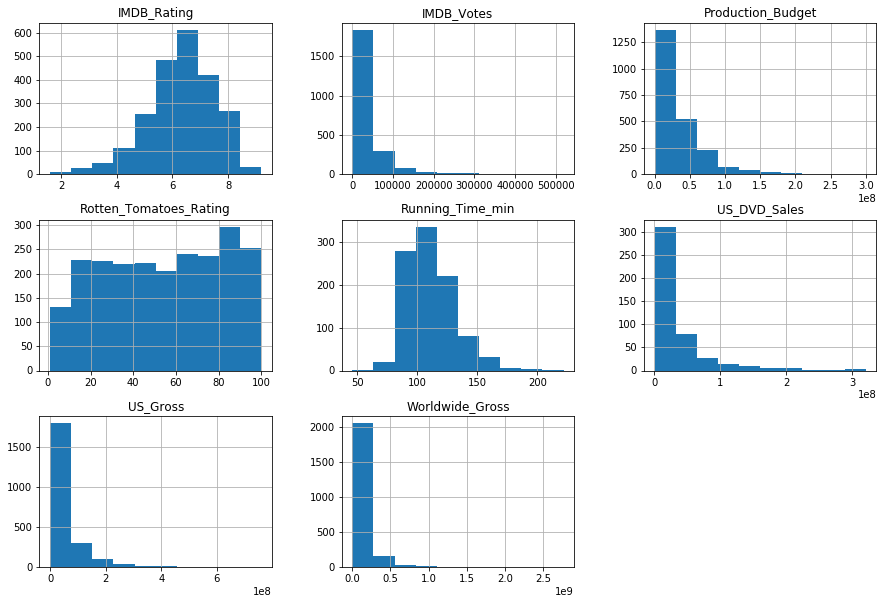

In [61]:
# Implement
movies.hist(figsize=(15,10), layout=(3,3))

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

Text(0,0.5,'Frequency')

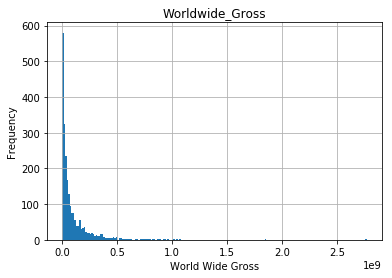

In [66]:
movies.hist(column= 'Worldwide_Gross', bins=200)
plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

Text(0,0.5,'Frequency')

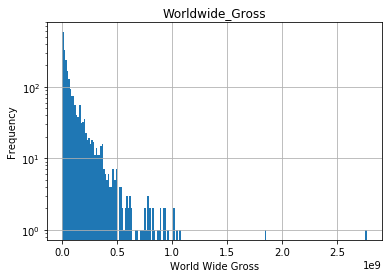

In [75]:
movies.hist(column='Worldwide_Gross',log=True,  bins=200)

plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


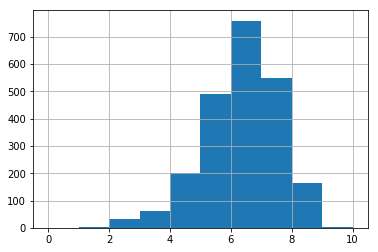

In [76]:
movies.IMDB_Rating.hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [77]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [96]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0


**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

Text(0,0.5,'Frequency')

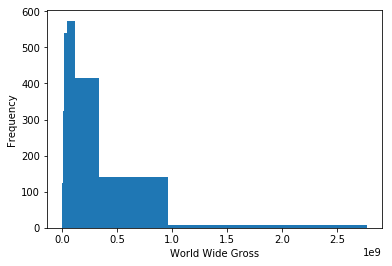

In [201]:
bins=np.logspace(np.log10(min(movies.Worldwide_Gross)), np.log10(max(movies.Worldwide_Gross)+1),20)
plt.hist(movies['Worldwide_Gross'], bins=bins)
plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

Text(0,0.5,'Frequency')

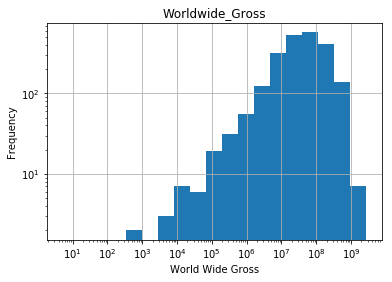

In [202]:
bins=np.logspace(np.log10(min(movies.Worldwide_Gross)), np.log10(max(movies.Worldwide_Gross)+1),20)
movies.hist(column='Worldwide_Gross',log=True, bins=bins) # yaxis is log
plt.xscale('log') #xaxis is log
plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

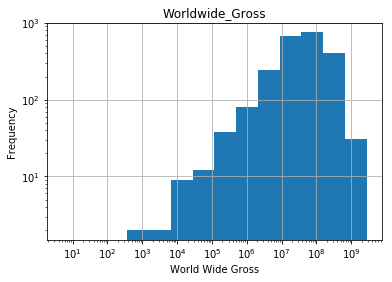

In [203]:
bins=np.logspace(np.log10(min(movies.Worldwide_Gross)), np.log10(max(movies.Worldwide_Gross)),15)
movies.hist(column='Worldwide_Gross',log=True, bins=bins) # yaxis is log
plt.xscale('log') #xaxis is log
plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

Q: explain and fix
Q: Can you explain the plot? Why are there gaps?

Answers:
When plotting discrete data, it is ineviteble that, dpending on the size of the bins, not all the bins will contain the data. There is an isolated occurance of movies < 1000 in World Wide Gross value, majority of the data is located above 2000
We could decrease the number of bins to impute .

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

C:\Users\yyezeret\AppData\Local\Continuum\Anaconda2\envs\dviz\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


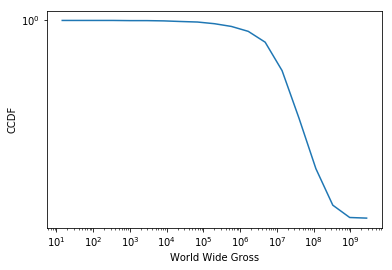

In [194]:
counts, bin_edges = np.histogram (movies.Worldwide_Gross, bins=bins, normed=True)
ccdf = 1-np.cumsum(counts)
plt.xscale('log') #xaxis is log
plt.yscale('log') #yaxis is log
plt.xlabel("World Wide Gross")
plt.ylabel("CCDF")
plt.plot (bin_edges[1:], ccdf)

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

C:\Users\yyezeret\AppData\Local\Continuum\Anaconda2\envs\dviz\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


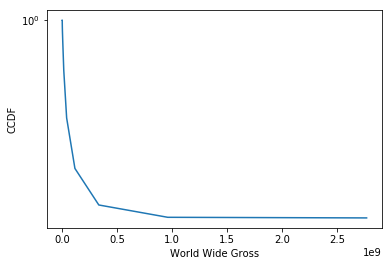

In [200]:
counts, bin_edges = np.histogram (movies.Worldwide_Gross, bins=bins, normed=True)
ccdf = 1-np.cumsum (counts)
plt.yscale('log') #yaxis is log
plt.xlabel("World Wide Gross")
plt.ylabel("CCDF")
plt.plot (bin_edges[1:], ccdf)

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

In [207]:
# Return label of an index of first occurrence of maximum Worldwide_Gross. 
max_gross_index= movies.Worldwide_Gross.idxmax()

In [210]:
# loc interprets the label of an index, never the integer position of an index
movies.loc[lambda movies: movies['Worldwide_Gross'] == max(movies.Worldwide_Gross)]

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
1234,Science Fiction,James Cameron,20th Century Fox,8.3,261439.0,PG-13,Action,237000000.0,18-Dec-09,83.0,NaN,Original Screenplay,Avatar,146153933.0,760167650.0,2.767892e+09


In [208]:
# Returns the row per index, Access group of values using labels of index
movies.loc[max_gross_index]

Creative_Type                 Science Fiction
Director                        James Cameron
Distributor                  20th Century Fox
IMDB_Rating                               8.3
IMDB_Votes                             261439
MPAA_Rating                             PG-13
Major_Genre                            Action
Production_Budget                    2.37e+08
Release_Date                        18-Dec-09
Rotten_Tomatoes_Rating                     83
Running_Time_min                          NaN
Source                    Original Screenplay
Title                                  Avatar
US_DVD_Sales                      1.46154e+08
US_Gross                          7.60168e+08
Worldwide_Gross                   2.76789e+09
Name: 1234, dtype: object

In [209]:
# Access group of rows and columns by integer position of an index
movies.iloc[max_gross_index]

Creative_Type             Contemporary Fiction
Director                        Garry Marshall
Distributor                          Universal
IMDB_Rating                                5.8
IMDB_Votes                               10902
MPAA_Rating                                  R
Major_Genre                              Drama
Production_Budget                        2e+07
Release_Date                         11-May-07
Rotten_Tomatoes_Rating                      17
Running_Time_min                           111
Source                     Original Screenplay
Title                             Georgia Rule
US_DVD_Sales                       1.93823e+07
US_Gross                           1.88829e+07
Worldwide_Gross                    2.08196e+07
Name: 1808, dtype: object

In [ ]:
#After comparing loc() and iloc() we can easily see that the loc function is based on the label of the index and returns, in our case, 
# the correct row ("Avatar"), identified by the max_gross_index that was computed by idxmax().
# iloc() function is based on the integer position of the row. By providing max_gross_index as an input for iloc  
# we mistakenly selected a movie that locates on the respective row without a reference to the index of the most 
# successful movie in the dataset. 